# Lecture 3 & 4 Examples
**UCLA, Econ 10P: Introduction to Python for Economists**   
**Dr. Randall R. Rojas**

 # I. File Operations, Modules &  Methods
 Note: For reading/writing files, we will cover it in  more detail when we introduce the `pandas` library.

1. Import the datafile `wage1` from the Wooldridge library, and explore its contents. Use the functions `type`, `head`, `tail`, `describe`, and so on to better understand the variables. To get a more quantitative insight, compute statistical measures such as the  mean, median, standard deviation, etc.

2. For this example, we will import the daily stock prices and volume of Apple and Amazon. We will then compute a couple of statistical measures, and figure out which company has yielded a higher return between 2017 and 2022.

In [1]:
import pandas as pd
import pandas_datareader.data as web
# Get stock data from Yahoo 
all_data = {ticker: web.get_data_yahoo(ticker)
           for ticker in ['AAPL', 'AMZN', 'TSLA']}

In [2]:
# Examine the contents of the datafile
all_data

{'AAPL':                   High         Low        Open       Close       Volume  \
 Date                                                                      
 2017-08-01   37.555000   37.102501   37.275002   37.512501  141474400.0   
 2017-08-02   39.937500   39.040001   39.820000   39.285000  279747200.0   
 2017-08-03   39.302502   38.755001   39.262501   38.892502  108389200.0   
 2017-08-04   39.349998   38.922501   39.017502   39.097500   82239600.0   
 2017-08-07   39.730000   39.167500   39.264999   39.702499   87481200.0   
 ...                ...         ...         ...         ...          ...   
 2022-07-25  155.039993  152.279999  154.009995  152.949997   53623900.0   
 2022-07-26  153.089996  150.800003  152.259995  151.600006   55138700.0   
 2022-07-27  157.330002  152.160004  152.580002  156.789993   78620700.0   
 2022-07-28  157.639999  154.410004  156.979996  157.350006   81378700.0   
 2022-07-29  163.630005  159.500000  161.240005  162.509995  101689200.0   
 
  

In [3]:
# Look at APPL's data and check the start and end dates

In [4]:
# Start date
all_data['AAPL'].head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-08-01,37.555000,37.102501,37.275002,37.512501,141474400.0,35.511818
2017-08-02,39.937500,39.040001,39.820000,39.285000,279747200.0,37.189774
2017-08-03,39.302502,38.755001,39.262501,38.892502,108389200.0,36.818211
2017-08-04,39.349998,38.922501,39.017502,39.097500,82239600.0,37.012287
2017-08-07,39.730000,39.167500,39.264999,39.702499,87481200.0,37.585011


In [5]:
# Extract the 'Adjusted Closing Price' for each stock
price = pd.DataFrame({ticker: data['Adj Close']
                     for ticker, data in all_data.items() })
price

,AAPL,AMZN,TSLA
Date,,,
2017-08-01,35.511818,49.809502,63.914001
2017-08-02,37.189774,49.794498,65.178001
2017-08-03,36.818211,49.346001,69.417999
2017-08-04,37.012287,49.379002,71.382004
2017-08-07,37.585011,49.613499,71.033997
...,...,...,...
2022-07-25,152.949997,121.139999,805.299988
2022-07-26,151.600006,114.809998,776.580017
2022-07-27,156.789993,120.970001,824.460022


<AxesSubplot:>

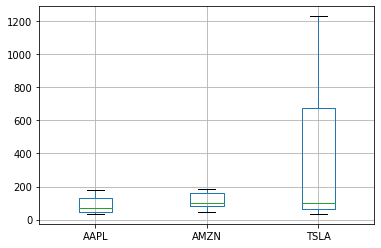

In [6]:
#  Try different attributes such price.boxplot(), price.mean(), etc.
price.boxplot()

In [7]:
price.mean()

AAPL     87.679781
AMZN    114.804856
TSLA    342.278233
dtype: float64

In [8]:
price.median()

AAPL     68.624603
AMZN     98.537498
TSLA    102.785000
dtype: float64

In [9]:
price.std()

AAPL     46.245803
AMZN     39.889709
TSLA    348.079008
dtype: float64

In [10]:
# Extract the Volume
volume = pd.DataFrame({ticker: data['Volume']
                     for ticker, data in all_data.items() })
volume

,AAPL,AMZN,TSLA
Date,,,
2017-08-01,141474400.0,91452000.0,41515500.0
2017-08-02,279747200.0,81400000.0,65457500.0
2017-08-03,108389200.0,65116000.0,67675000.0
2017-08-04,82239600.0,54606000.0,46344500.0
2017-08-07,87481200.0,53532000.0,31622500.0
...,...,...,...
2022-07-25,53623900.0,50221300.0,21357800.0
2022-07-26,55138700.0,67075100.0,22273600.0
2022-07-27,78620700.0,61582000.0,29370000.0


In [11]:
#  Try different attributes such volume.boxplot(), volume.mean(), etc.

<AxesSubplot:>

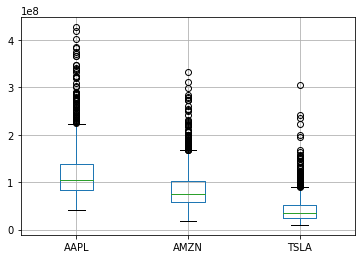

In [12]:
volume.boxplot()

In [13]:
volume.mean()

AAPL    1.193949e+08
AMZN    8.636556e+07
TSLA    4.415033e+07
dtype: float64

In [14]:
volume.median()

AAPL    104897600.0
AMZN     74840000.0
TSLA     34239650.0
dtype: float64

In [15]:
volume.std()

AAPL    5.514711e+07
AMZN    4.103503e+07
TSLA    3.006163e+07
dtype: float64

To convert stock prices to returns, we can use the formula: $$Return = \frac{S_t - S_{t-1}}{S_{t-1}}.$$
However, since want to compute log-returns, we will use the formula $$\log(Return) =  \log\left(\frac{S_t}{S_{t-1}}\right).$$

In [16]:
# We need to import numpy to have access to cetain  mathematical operations such as the log function
import numpy as np
price['AAPL']/price['AAPL'].shift(1)

Date
2017-08-01         NaN
2017-08-02    1.047251
2017-08-03    0.990009
2017-08-04    1.005271
2017-08-07    1.015474
                ...   
2022-07-25    0.992602
2022-07-26    0.991174
2022-07-27    1.034235
2022-07-28    1.003572
2022-07-29    1.032793
Name: AAPL, Length: 1258, dtype: float64

In [17]:
# Compute daily log returns for AAPL
log_returns_AAPL = np.log(price['AAPL']/price['AAPL'].shift(1))


In [18]:
# Compute daily log returns for AMZN
log_returns_AMZN = np.log(price['AMZN']/price['AMZN'].shift(1))

In [19]:
# Find the correlation between the two stock prices. What does the estimated value suggest?
np.corrcoef(price['TSLA'], price['AAPL'])

array([[1.        , 0.96533975],
       [0.96533975, 1.        ]])

We can plot the Efficient Frontier portfolios made up of these two stocks. The code below is from [F. Neves (2018)](https://towardsdatascience.com/python-markowitz-optimization-b5e1623060f5).

In [20]:
# Combine the prices into one variable.
stocks =   pd.concat([price['AAPL'], price['AMZN'], price['TSLA']],axis = 1)

# Compute the log-returns
log_ret = np.log(stocks/stocks.shift(1))
log_ret.mean()


AAPL    0.001210
AMZN    0.000793
TSLA    0.002097
dtype: float64

In [21]:
from tkinter import W
import numpy as np
np.random.seed(42)
num_ports = 6000
num_stocks = 3
all_weights = np.zeros((num_ports, len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)

for x in range(num_ports):
    # Weights
    weights = np.array(np.random.random(num_stocks))
    weights = weights/np.sum(weights)

    
    # Save weights
    all_weights[x,:] = weights
    # Expected return
    ret_arr[x] = np.sum( (log_ret.mean() * weights * 252))
    
    # Expected volatility

    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    
    # Sharpe Ratio
    sharpe_arr[x] = ret_arr[x]/vol_arr[x]
    

    

In [22]:
# Print the max sharpe ratio (and it's location)
print("Max Sharpe Ratio =",sharpe_arr.max())
print("Allocation =",all_weights[sharpe_arr.argmax(),:])
print("Return =",ret_arr[sharpe_arr.argmax()])
print("Risk =",vol_arr[sharpe_arr.argmax()])


#  Print the weights for AAPL and  AMZN respectively

Max Sharpe Ratio = 1.0429334446301306
Allocation = [0.73730335 0.00106167 0.26163498]
Return = 0.36324349452071836
Risk = 0.3482901966477259


NameError: name 'max_sr_vol' is not defined

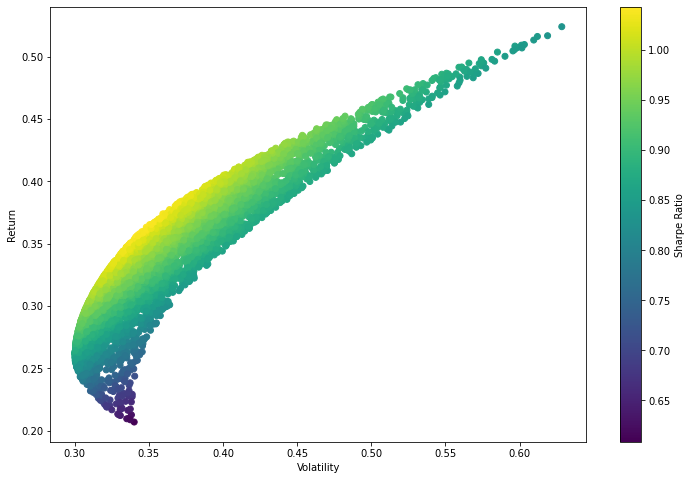

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.scatter(max_sr_vol, max_sr_ret,c='red', s=50) # red dot
plt.show()

In the previous example, we did not impose any constraints such as making sure the weights add up to 1 and are restricted to the (0, 1) interval. Below, we therefore, optimize the estimated weights.

In [ ]:
def get_ret_vol_sr(weights):
    weights = np.array(weights)
    ret = np.sum(log_ret.mean() * weights) * 252
    vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov()*252, weights)))
    sr = ret/vol
    return np.array([ret, vol, sr])

def neg_sharpe(weights):
# the number 2 is the sharpe ratio index from the get_ret_vol_sr
    return get_ret_vol_sr(weights)[2] * -1

def check_sum(weights):
    #return 0 if sum of the weights is 1
    return np.sum(weights)-1

In [ ]:
cons =  ({'type':'eq','fun':check_sum})
bounds = ((0,1),(0,1))
init_guess = [0.33, 0.33]

In [ ]:
from scipy.optimize import minimize
opt_results  = minimize(neg_sharpe , init_guess, method = 'SLSQP',bounds = bounds, constraints =cons)

ValueError: operands could not be broadcast together with shapes (3,) (2,) 

In [ ]:
get_ret_vol_sr(opt_results.x)

array([0.30490077, 0.32228896, 0.94604782])

## II. Classes

1. Create a class, *Health*, that computes a person's BMI (Body Mass Index) and BMR (Basal Metabolic Rate) based on their weight (in pounds), height (in inches), age (in years), and gender ("M", "F"). Once computed, output the person's bmi, bmr and respective recommendations based on the tables below. Make sure to use the constructor (method) `\_\_init\_\_()`  

**BMI Recommendations**   
Underweight: BMI < 18.5      
Normal: 18.5 < BMI < 24.9    
Overweight:  25 < BMI < 29.9   
Obese: BMI > 30  

**BMR Recommendations**   
Sedentary: little or no exercise $ = 1.2 \times BMR$  
Lightly Active: exercise/sports 1-3 days/week $ = 1.375 \times BMR$  
Moderately Active: exercise/sports 3-5 days/week $ = 1.55 \times BMR$  
Very Active: exercise/sports 6-7 days/week $ = 1.725 \times BMR$  
Extra Active: exercise daily, or physical job $ = 1.9 \times BMR$  

**Formulas**  
You can compute the BMI and BMR as follows:  
$BMI = \frac{weight}{height^2}\times 703$   
$BMR \;(Female) = 655 + (4.3 \times weight) + (4.7 \times height) - (4.7 \times age)$  
$BMR \;(Male)  = 66 + (6.3 \times weight) + (12.9 \times height) - (6.8 \times age)$  

In [ ]:
class Health: 
    weight = 0
    height = 0
    age = 0
    
    def __init__(measurements, weight, height, gender, age): 
        measurements.weight = weight
        measurements.height = height
        measurements.gender = gender
        measurements.age = age
        
    def bmi(measurements):
        bmi_temp = (measurements.weight/(measurements.height**2))*703
        if bmi_temp < 18.5:
            print(f"Based on your BMI = {bmi_temp:.2f}, you are considered Underweight")
        elif 18.5 < bmi_temp < 24.9:
            print(f"Based on your BMI = {bmi_temp:.2f}, you are considered Normal")
        elif 25 < bmi_temp < 29.9:
            print(f"Based on your BMI = {bmi_temp:.2f}, you are considered Overweight")
        else:    
            print(f"Based on your BMI = {bmi_temp:.2f}, you are considered Obese")
       # return (measurements.weight/(measurements.height**2))*703
    
    def bmr(measurements):
        bmr_temp_M = 66 + (6.3*measurements.weight) + (12.9*measurements.height) - (6.8*measurements.age)
        bmr_temp_F = 655 + (4.3*measurements.weight) + (4.7*measurements.height) - (4.7*measurements.age)
        if measurements.gender == "M":
            print(f"Based on your BMR = {bmr_temp_M:.2f} here are your recommended caloric intakes per activity level:")
            print(f"Sedentary: little or no exercise = {1.2*bmr_temp_M:.2f} Calories")
            print(f"Lightly Active: exercise/sports 1-3 days/week = {1.375*bmr_temp_M:.2f} Calories")
            print(f"Moderately Active: exercise/sports 3-5 days/week = {1.55*bmr_temp_M:.2f} Calories")
            print(f"Very Active: exercise/sports 6-7 days/week = {1.725*bmr_temp_M:.2f} Calories")
            print(f"Extra Active: exercise daily, or physical job = {1.9*bmr_temp_M:.2f} Calories")
        else:
            print(bmr_temp_F)
            print(f"Based on your BMR = {bmr_temp_F:.2f}, here are your recommended caloric intakes per activity level:")
            print(f"Sedentary: little or no exercise = {1.2*bmr_temp_F:.2f} Calories")
            print(f"Lightly Active: exercise/sports 1-3 days/week = {1.375*bmr_temp_F:.2f} Calories")
            print(f"Moderately Active: exercise/sports 3-5 days/week = {1.55*bmr_temp_F:.2f} Calories")
            print(f"Very Active: exercise/sports 6-7 days/week = {1.725*bmr_temp_F:.2f} Calories")
            print(f"Extra Active: exercise daily, or physical job = {1.9*bmr_temp_F:.2f} Calories")
       

In [ ]:
vitals = Health(130, 70.8,"F",48)

In [ ]:
vitals.bmi()

In [ ]:
vitals.bmr()